# 真实函数
$$
f(x) = 2e^{-x}sinx
$$

# 采样数据
从真实函数中采样数据，并且添加噪声，噪声服从正态分布$\epsilon \sim N(0, \sigma^2)$
$$
g(x) = 2e^{-x}sinx + \epsilon \sim N(0, \sigma^2)
$$

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [9]:
def true_fun(x):
    # 真实函数
    return 2 * np.exp(-x) * np.sin(x)

In [10]:
def data_samples():
    # 从真实函数采用数据，并且添加噪声，模拟真实数据
    np.random.seed(0)  #随机种子
    n_samples = 30  #样本量
    X = np.sort(0 + np.random.rand(n_samples) * (6 - 0))  # 从[0,6]区间均匀分布采样
    y = true_fun(X) + np.random.random(n_samples) * 0.05   # 添加噪声
    return X, y

In [34]:
def model_train(X, y):
    # 模型训练和测试，采用多项式回归，最高阶次[1,3,5,15]
    degress = [1, 3, 5, 15]  # 阶次
    plt.figure(figsize=(20, 4), dpi=100)
    for i in range(len(degress)):
        plt.subplot(1, len(degress), i + 1)
        polynomial_features = PolynomialFeatures(degress[i], include_bias=False)  # 多项式数据特征预处理
        linear_regression = LinearRegression()  # 线性回归模型
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                 ("linear_regression", linear_regression)])
        pipeline.fit(X[:, np.newaxis], y)
        scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
        
        
        # 绘制图像
        X_test = np.linspace(0, 6, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True Function")
        plt.scatter(X, y, label="Sample")
        plt.legend(loc="best", fontsize=12)
        plt.xlabel("X", fontsize=12)
        plt.ylabel("Y", fontsize=12)
        plt.grid()
        plt.title("Degress {}\nMSE = {:.2e}(+\-{:.2e})".format(degress[i], -scores.mean(), scores.std()), fontsize=14)
plt.show()

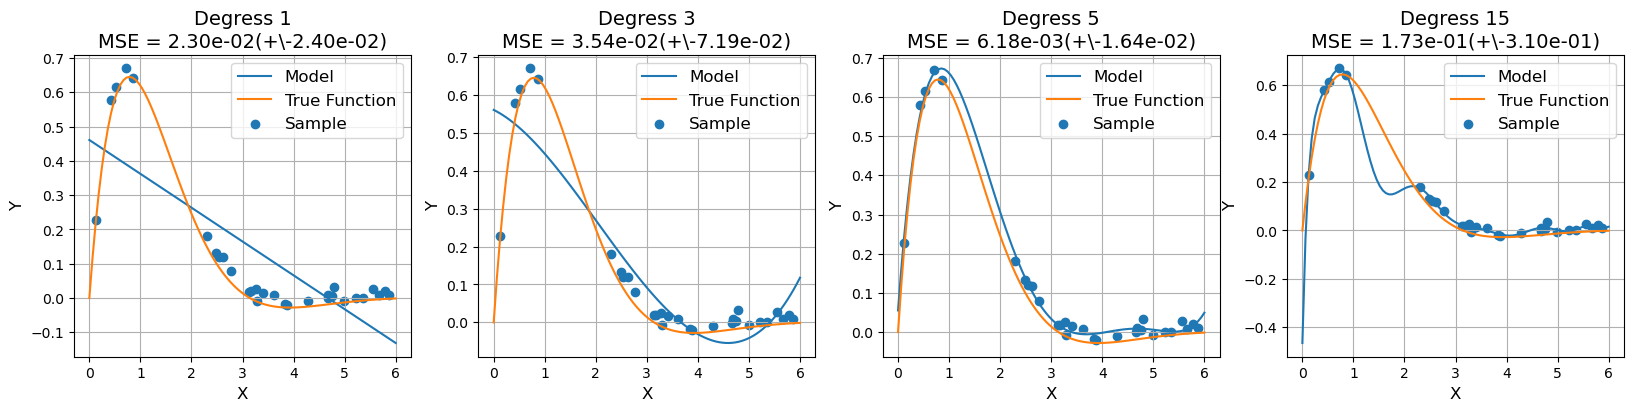

In [21]:
X, y = data_samples()
model_train(X, y)